In [41]:
using FileIO, JLD2
using DifferentialEquations
using Random

In [42]:
include("solvers.jl")
include("UsefulFunctions.jl")
include("PlotFunctions.jl")


PlotPipPlot (generic function with 1 method)

In [43]:
# initial conditions
x = [-7; 
     -7; 
     15]
x2 = [20; 
      -15; 
      3]
θ = 10; μ = 28; β = 8/3
p = [θ μ β]
t = 40
epsilon_vals = zeros(5)
for i=1:5
    epsilon_vals[i] = 10^(-float(i))
end
Δt = 0.0002 #as small as smallest dt we tested with

0.0002

In [44]:
function P8(t)
    return [θ, 19+5*sin(2*pi*t), β]
end

P8 (generic function with 1 method)

In [45]:
function P8_Pert(t)
    return [θ, 19+5*sin(2*pi*t)+ϵ*t^2, β]
end

P8_Pert (generic function with 1 method)

In [46]:
X=lorenz_solution_fixed_timestep(P8, Δt, Integer(t/Δt), x, RK4) 
M₁=zeros(3*length(epsilon_vals),Integer(t/Δt)+1)
for i=1:5
    ϵ = epsilon_vals[i]
    M₁[3*(i-1)+1:3*(i),1:end] = lorenz_solution_fixed_timestep(P8_Pert, Δt, Integer(t/Δt), x, RK4) 
end

In [49]:
CorrMatrix = correlation_matrix_initpos(M₁, X)

5×200001 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.795662  0.794702  0.793741
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.610416  0.609666  0.608914
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.999482  0.999478  0.999474
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.999938  0.999938  0.999938
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.999999  0.999999  0.999999

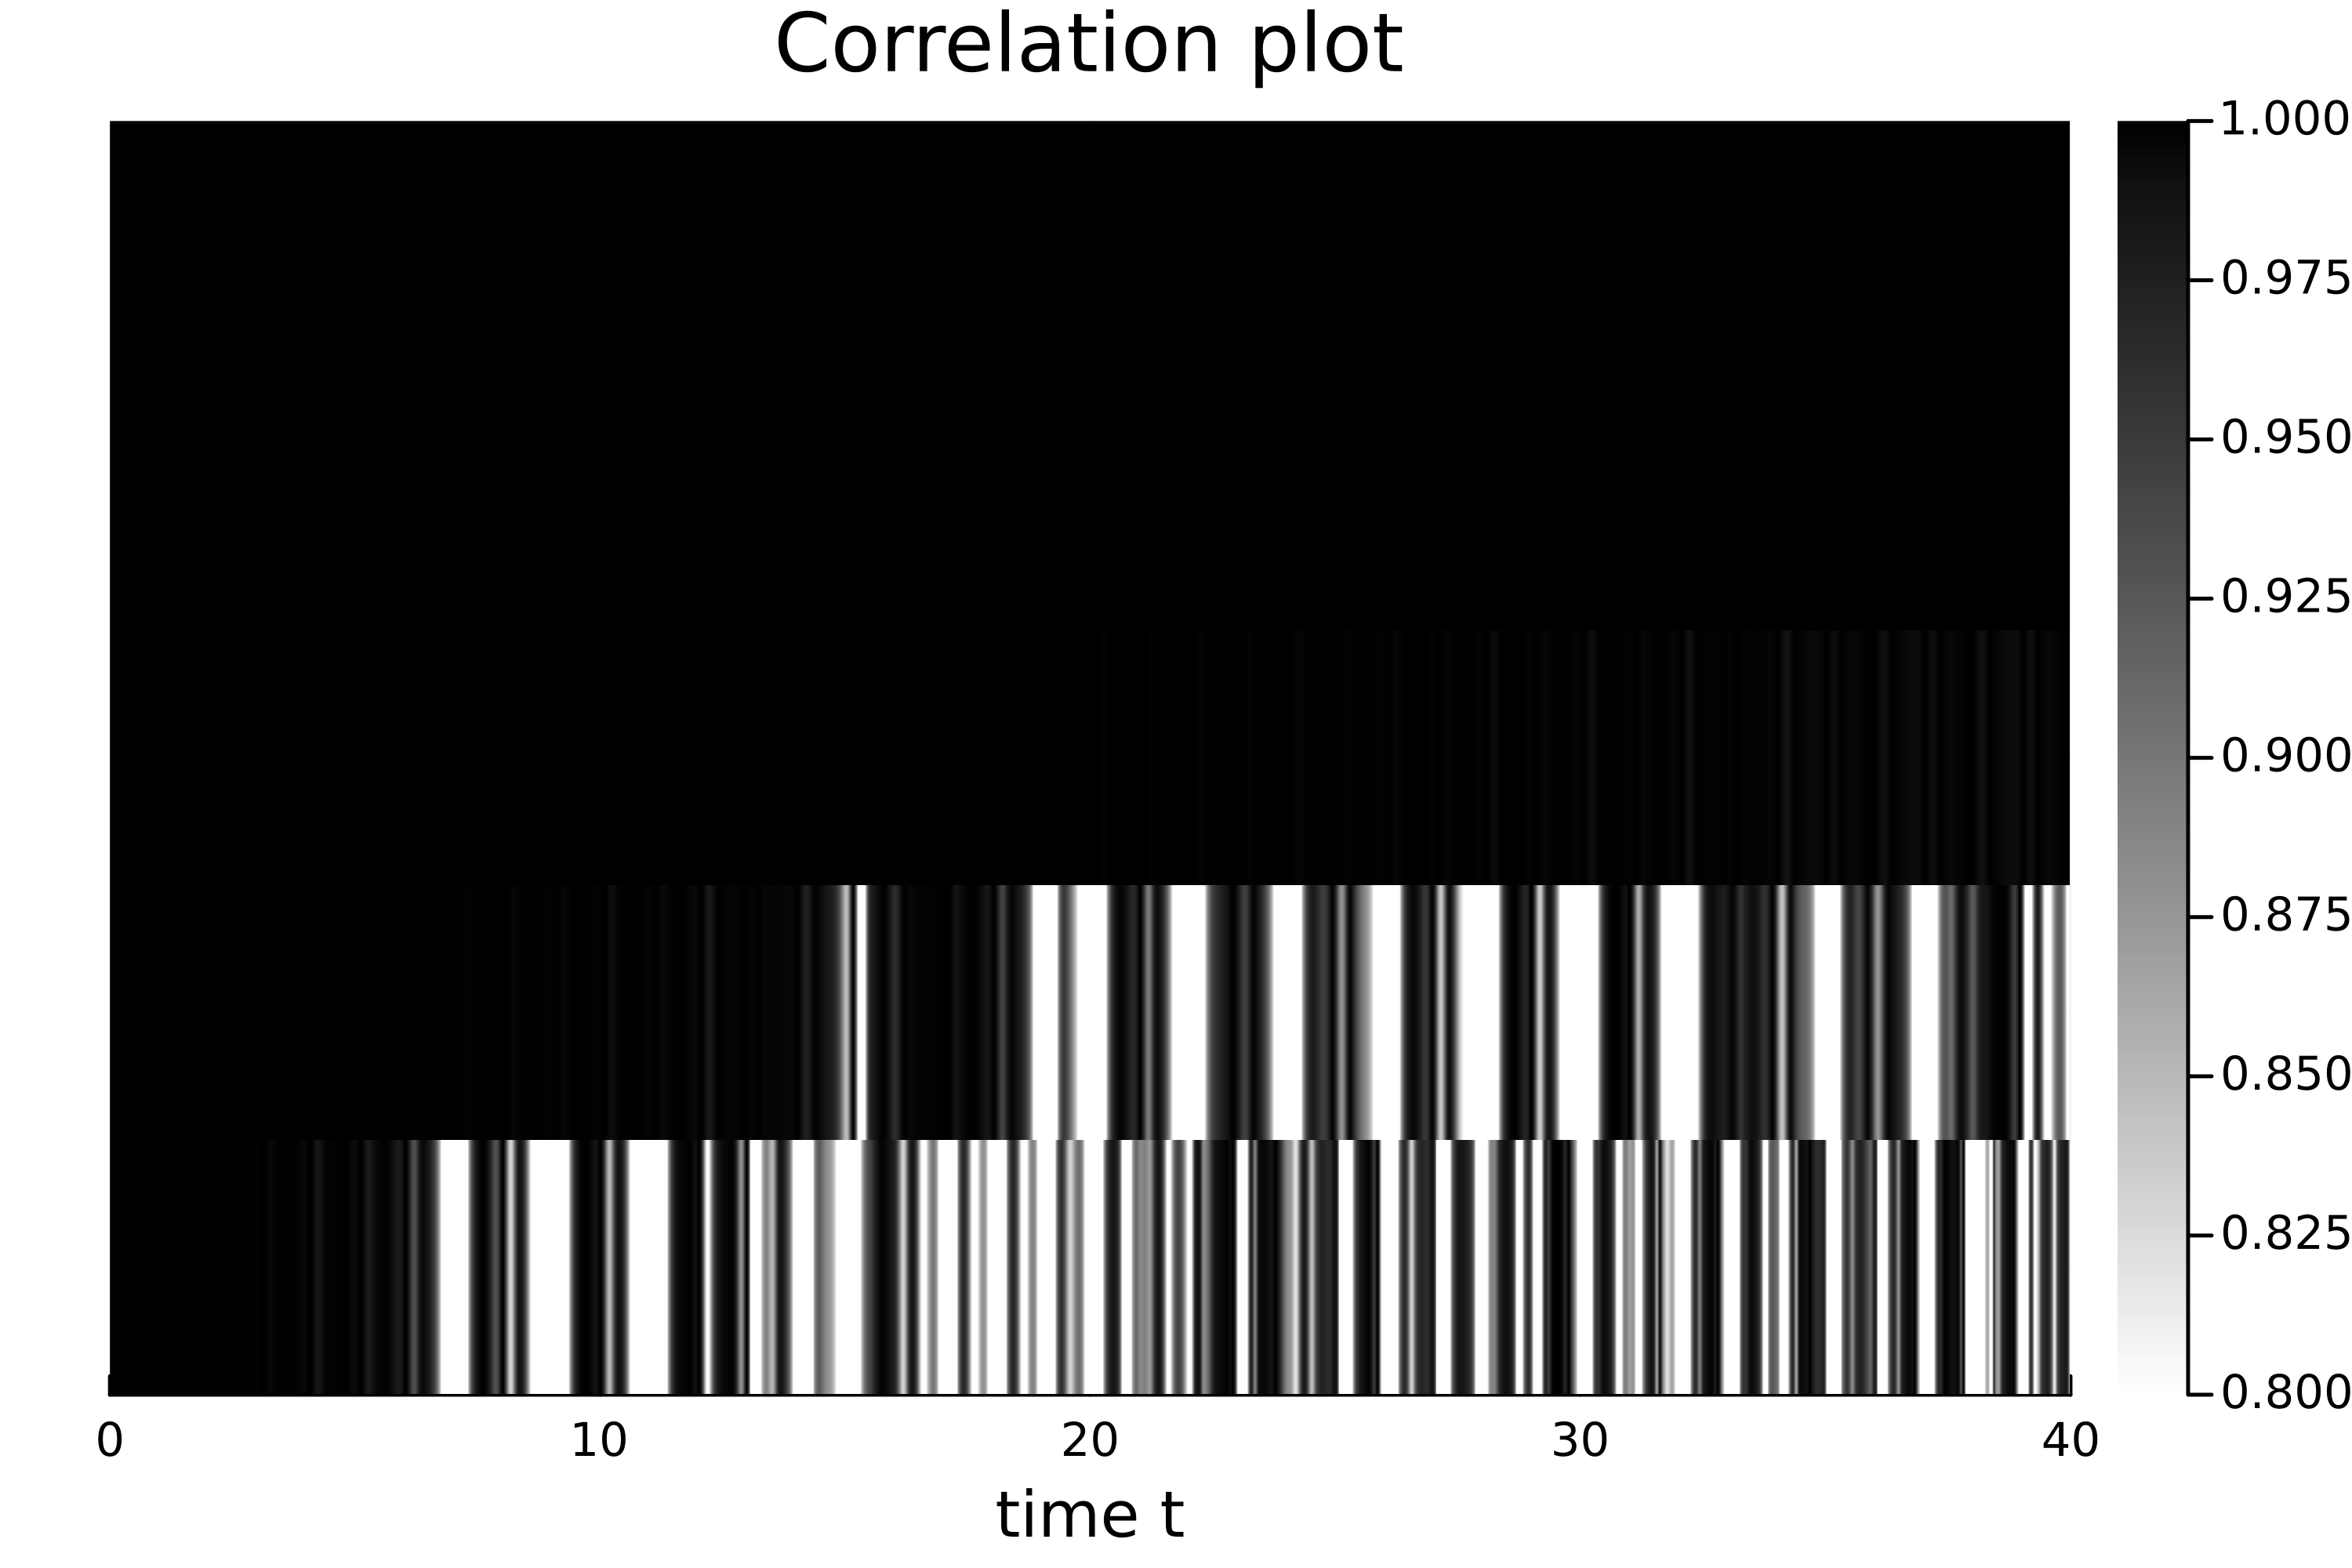

In [52]:
PlotPipPlot(CorrMatrix,Δt,title="Correlation plot",clim=(0.8,1),cmap=:grayC, yaxis=false)